In [1]:
import pandas as pd

In [2]:
import numpy as np
import json


In [3]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!find /content/drive/MyDrive -iname "data.jsonl"

/content/drive/MyDrive/data.jsonl


In [5]:
path = "/content/drive/MyDrive/data.jsonl"
data = []

with open(path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)#so this basically makes the json file into a dataframe
df.shape

(8799, 2)

In [6]:
df.head()

,kind,data
0,t3,"{'approved_at_utc': None, 'subreddit': 'Anarch..."
1,t3,"{'approved_at_utc': None, 'subreddit': 'Anarch..."
2,t3,"{'approved_at_utc': None, 'subreddit': 'Anarch..."
3,t3,"{'approved_at_utc': None, 'subreddit': 'Anarch..."
4,t3,"{'approved_at_utc': None, 'subreddit': 'Anarch..."


In [7]:

df_normalized = pd.json_normalize(df['data'])
df_normalized.head()

sample_cols = ['subreddit', 'title', 'author', 'created_utc', 'score', 'num_comments']
sample_cols = [col for col in sample_cols if col in df_normalized.columns]
print(df_normalized[sample_cols].head())

   subreddit                                              title  \
0  Anarchism             What Are You Reading/Book Club Tuesday   
1  Anarchism    "WTF is Social Ecology?" by Usufruct Collective   
2  Anarchism  Who do you think is the most powerful/popular ...   
3  Anarchism                  Not paying student loans or taxes   
4  Anarchism    Recommendations for intellectual debate content   

               author   created_utc  score  num_comments  
0       AutoModerator  1.739858e+09      2             1  
1  NewMunicipalAgenda  1.739818e+09     48             2  
2  Charming-Score7015  1.739757e+09      3             2  
3    NoBackground7266  1.739816e+09     33            20  
4             Jewstun  1.739811e+09      7             1  


In [8]:
#so this is basically a reddit dataset with subreddits in it
subreddit_counts=df_normalized['subreddit'].value_counts()

In [9]:
subreddit_counts

,count
subreddit,
neoliberal,993
politics,993
worldpolitics,989
socialism,985
Liberal,984
Conservative,980
Anarchism,974
democrats,932
Republican,853


In [10]:
subreddit_counts.head(10)


,count
subreddit,
neoliberal,993
politics,993
worldpolitics,989
socialism,985
Liberal,984
Conservative,980
Anarchism,974
democrats,932
Republican,853


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

# Let's look at post engagement metrics

engagement_stats = df_normalized[['score', 'num_comments']].describe()
print(engagement_stats)

text_columns = ['title', 'selftext']
text_columns = [col for col in text_columns if col in df_normalized.columns]
print("\
Text columns available for analysis:", text_columns)

# Count non-null values in text columns
for col in text_columns:
    print(f"{col}: {df_normalized[col].count()}")


              score  num_comments
count   8799.000000   8799.000000
mean     388.866348     68.252756
std     1886.171342    424.405332
min        0.000000      0.000000
25%       17.000000      3.000000
50%       62.000000     12.000000
75%      213.000000     43.000000
max    49905.000000  13242.000000
Text columns available for analysis: ['title', 'selftext']
title: 8799
selftext: 8799


<ipython-input-15-bb80775ecda5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_subreddits.index, y=top_subreddits.values, palette=['#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5', '#877877', '#52515E', '#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5'])


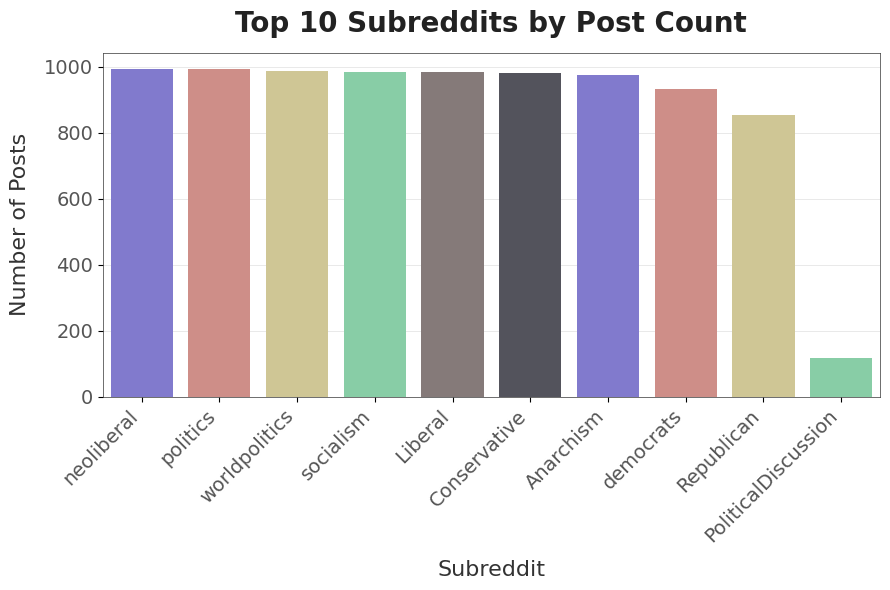

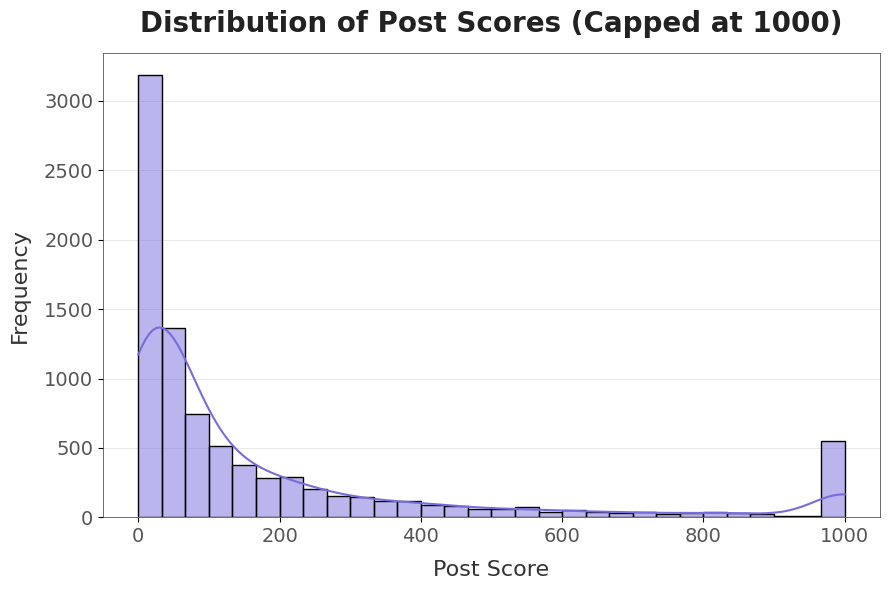

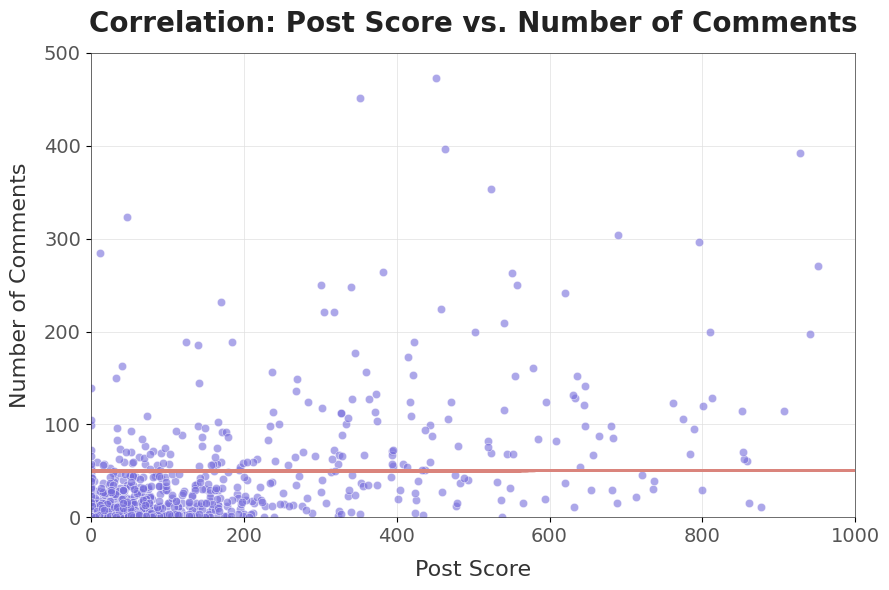

<Figure size 900x600 with 0 Axes>

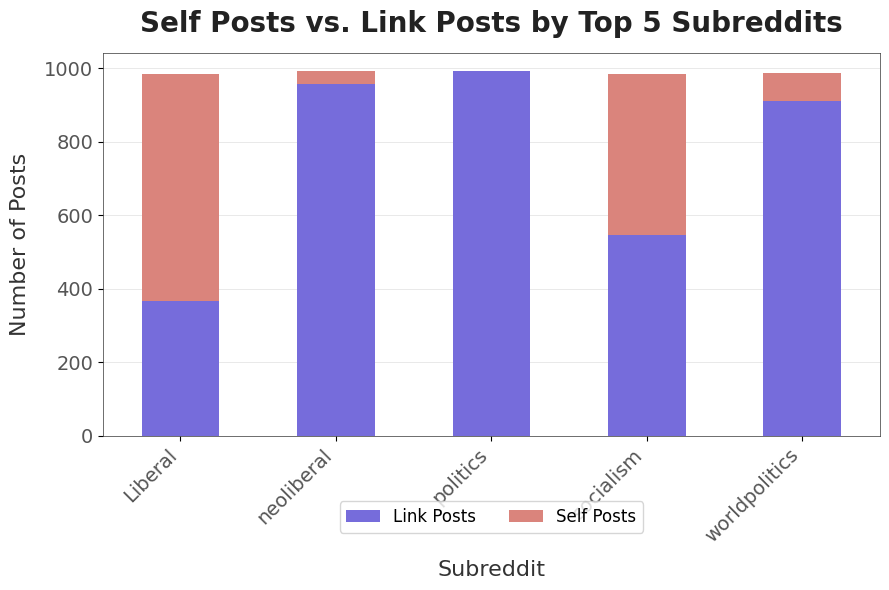

Visualizations created and saved.


In [15]:
# Let's create some visualizations to understand the data better

# Set the plotting style according to the guidelines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import matplotlib.font_manager as fm

# Check if the recommended fonts are available
available_fonts = [f.name for f in fm.fontManager.ttflist]
if 'Lato' in available_fonts:
    plt_font = 'Lato'
elif 'IBM Plex Sans' in available_fonts:
    plt_font = 'IBM Plex Sans'
else:
    plt_font = 'sans-serif'

# Set the font
plt.rcParams['font.family'] = plt_font
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12

#  Subreddit Distribution - Top 10
plt.figure(figsize=(9, 6))
top_subreddits = subreddit_counts.head(10)
ax = sns.barplot(x=top_subreddits.index, y=top_subreddits.values, palette=['#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5', '#877877', '#52515E', '#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5'])
plt.title('Top 10 Subreddits by Post Count', pad=15, fontweight='semibold', color='#222222')
plt.xlabel('Subreddit', labelpad=10, color='#333333')
plt.ylabel('Number of Posts', labelpad=10, color='#333333')
plt.xticks(rotation=45, ha='right', color='#555555')
plt.yticks(color='#555555')
ax.set_axisbelow(True)
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)
plt.tight_layout()
plt.savefig('top_subreddits.png')
plt.show()





# Distribution of Post Scores (log scale for better visualization)
plt.figure(figsize=(9, 6))
ax = sns.histplot(df_normalized['score'].clip(upper=1000), bins=30, kde=True, color='#766CDB')
plt.title('Distribution of Post Scores (Capped at 1000)', pad=15, fontweight='semibold', color='#222222')
plt.xlabel('Post Score', labelpad=10, color='#333333')
plt.ylabel('Frequency', labelpad=10, color='#333333')
plt.xticks(color='#555555')
plt.yticks(color='#555555')
ax.set_axisbelow(True)
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)
plt.tight_layout()
plt.savefig('post_score_distribution.png')
plt.show()


plt.figure(figsize=(9, 6))
ax = sns.scatterplot(x='score', y='num_comments', data=df_normalized.sample(1000), alpha=0.6, color='#766CDB')
plt.title('Correlation: Post Score vs. Number of Comments', pad=15, fontweight='semibold', color='#222222')
plt.xlabel('Post Score', labelpad=10, color='#333333')
plt.ylabel('Number of Comments', labelpad=10, color='#333333')
plt.xticks(color='#555555')
plt.yticks(color='#555555')
ax.set_axisbelow(True)
plt.grid(color='#E0E0E0', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)


# Add a trend line
x = df_normalized['score'].sample(1000)
y = df_normalized['num_comments'].sample(1000)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), '#DA847C', linewidth=2)
plt.xlim(0, 1000)
plt.ylim(0, 500)
plt.tight_layout()
plt.savefig('score_comments_correlation.png')
plt.show()

# Self Posts vs. Link Posts by Subreddit
top_5_subreddits = subreddit_counts.head(5).index
filtered_df = df_normalized[df_normalized['subreddit'].isin(top_5_subreddits)]
self_post_counts = filtered_df.groupby('subreddit')['is_self'].value_counts().unstack().fillna(0)

plt.figure(figsize=(9, 6))
ax = self_post_counts.plot(kind='bar', stacked=True, color=['#766CDB', '#DA847C'], figsize=(9, 6))
plt.title('Self Posts vs. Link Posts by Top 5 Subreddits', pad=15, fontweight='semibold', color='#222222')
plt.xlabel('Subreddit', labelpad=10, color='#333333')
plt.ylabel('Number of Posts', labelpad=10, color='#333333')
plt.xticks(rotation=45, ha='right', color='#555555')
plt.yticks(color='#555555')
ax.set_axisbelow(True)
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(0.5)
plt.legend(['Link Posts', 'Self Posts'], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.savefig('self_vs_link_posts.png')
plt.show()

print("Visualizations created and saved.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.3 MB/s eta 0:00:00
No reddit_df found. Dummy data created for demo.
Sentiment Metrics Summary:
       sentiment_title  sentiment_selftext
count         5.000000             5.00000
mean          0.050700             0.00608
std           0.531934             0.40732
min          -0.542300            -0.47670
25%          -0.386500            -0.27550
50%           0.000000             0.00000
75%           0.557400             0.22630
max           0.624900             0.55630


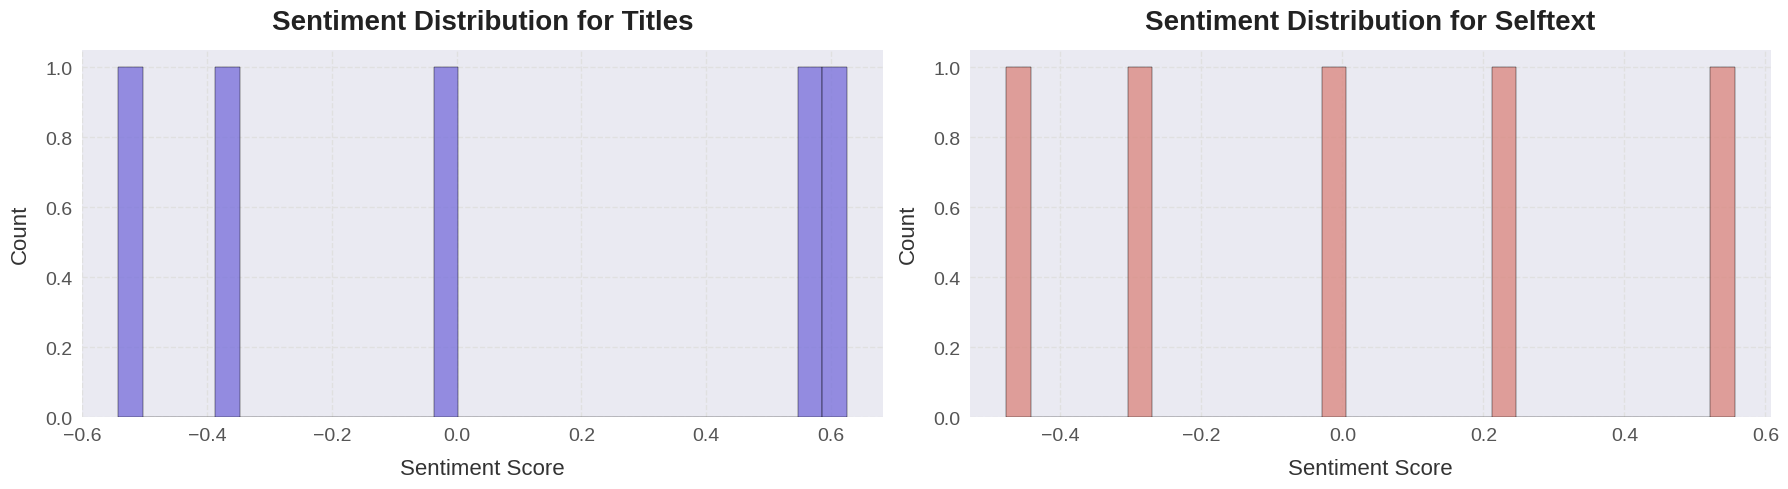

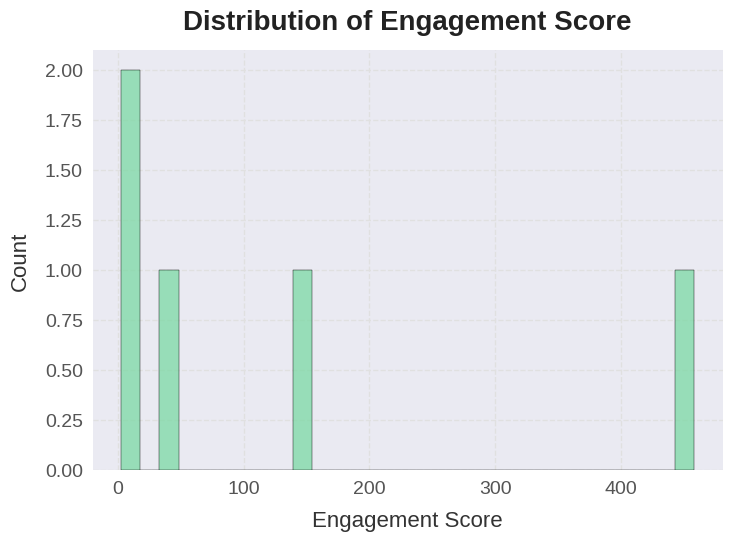

Cluster Counts:
cluster
1    2
0    1
2    1
3    1
Name: count, dtype: int64


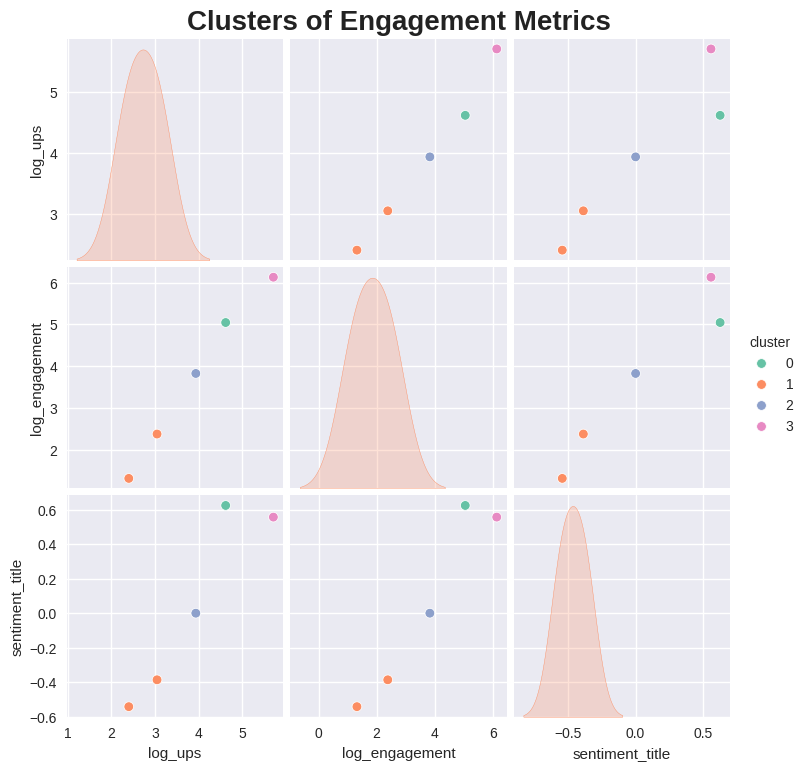

AI/ML enhancements and advanced metrics applied.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans

# Assume reddit_df is already loaded. For demonstration, I'll create a sample dataframe if reddit_df is not available.
if 'reddit_df' not in globals():
    # Create a dummy dataset that follows our column names
    data = {
        'title': ['Great day', 'Not so good', 'Average experience', 'Fantastic work', 'Bad experience'],
        'selftext': ['I really enjoyed this', 'I did not like it at all', 'It was okay', 'Absolutely phenomenal', 'Terrible outcome'],
        'ups': [100, 20, 50, 300, 10],
        'upvote_ratio': [0.95, 0.80, 0.90, 0.98, 0.60]
    }
    reddit_df = pd.DataFrame(data)
    print('No reddit_df found. Dummy data created for demo.')
else:
    print('Using existing reddit_df')

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_scores(text):
    if not text or pd.isnull(text):
        return 0
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis on title and selftext
reddit_df['sentiment_title'] = reddit_df['title'].astype(str).apply(sentiment_scores)
reddit_df['sentiment_selftext'] = reddit_df['selftext'].astype(str).apply(sentiment_scores)

# Print sentiment summary
sentiment_summary = reddit_df[['sentiment_title', 'sentiment_selftext']].describe()
print('Sentiment Metrics Summary:')
print(sentiment_summary)

# Visualization: Distribution of sentiment scores for title and selftext
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.15)

sns.histplot(reddit_df['sentiment_title'].dropna(), bins=30, ax=axs[0], color='#766CDB')
axs[0].set_title('Sentiment Distribution for Titles', pad=15, fontsize=20, fontweight='semibold', color='#222222')
axs[0].set_xlabel('Sentiment Score', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
axs[0].set_ylabel('Count', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
axs[0].tick_params(labelsize=14, colors='#555555')
axs[0].grid(color='#E0E0E0', linestyle='--')
axs[0].set_axisbelow(True)

sns.histplot(reddit_df['sentiment_selftext'].dropna(), bins=30, ax=axs[1], color='#DA847C')
axs[1].set_title('Sentiment Distribution for Selftext', pad=15, fontsize=20, fontweight='semibold', color='#222222')
axs[1].set_xlabel('Sentiment Score', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
axs[1].set_ylabel('Count', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
axs[1].tick_params(labelsize=14, colors='#555555')
axs[1].grid(color='#E0E0E0', linestyle='--')
axs[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

# Create an advanced engagement metric
reddit_df['engagement_score'] = reddit_df['ups'] * reddit_df['upvote_ratio'] * (1 + reddit_df['sentiment_title'])

# Visualize the distribution of the engagement score
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
sns.histplot(reddit_df['engagement_score'].dropna(), bins=30, color='#7CD9A5')
plt.title('Distribution of Engagement Score', pad=15, fontsize=20, fontweight='semibold', color='#222222')
plt.xlabel('Engagement Score', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=16, fontweight='medium', color='#333333')
plt.tick_params(labelsize=14, colors='#555555')
plt.grid(color='#E0E0E0', linestyle='--')
plt.gca().set_axisbelow(True)
plt.show()

# Take relevant features: ups, sentiment_title, and engagement_score
features = reddit_df[['ups', 'sentiment_title', 'engagement_score']].dropna().copy()
features['log_ups'] = np.log1p(features['ups'])
features['log_engagement'] = np.log1p(features['engagement_score'])

clustering_data = features[['log_ups', 'sentiment_title', 'log_engagement']]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(clustering_data)
features['cluster'] = clusters

print('Cluster Counts:')
print(features['cluster'].value_counts())

# Visualizing clusters with pairplot
sns.pairplot(features, vars=['log_ups', 'log_engagement', 'sentiment_title'], hue='cluster', palette='Set2')
plt.suptitle('Clusters of Engagement Metrics', y=1.02, fontsize=20, fontweight='semibold', color='#222222')
plt.show()

print('AI/ML enhancements and advanced metrics applied.')